In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/3. AI ML Bootcamp 2024/Week-4/diabetes_dataset.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Decision Tree Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.70


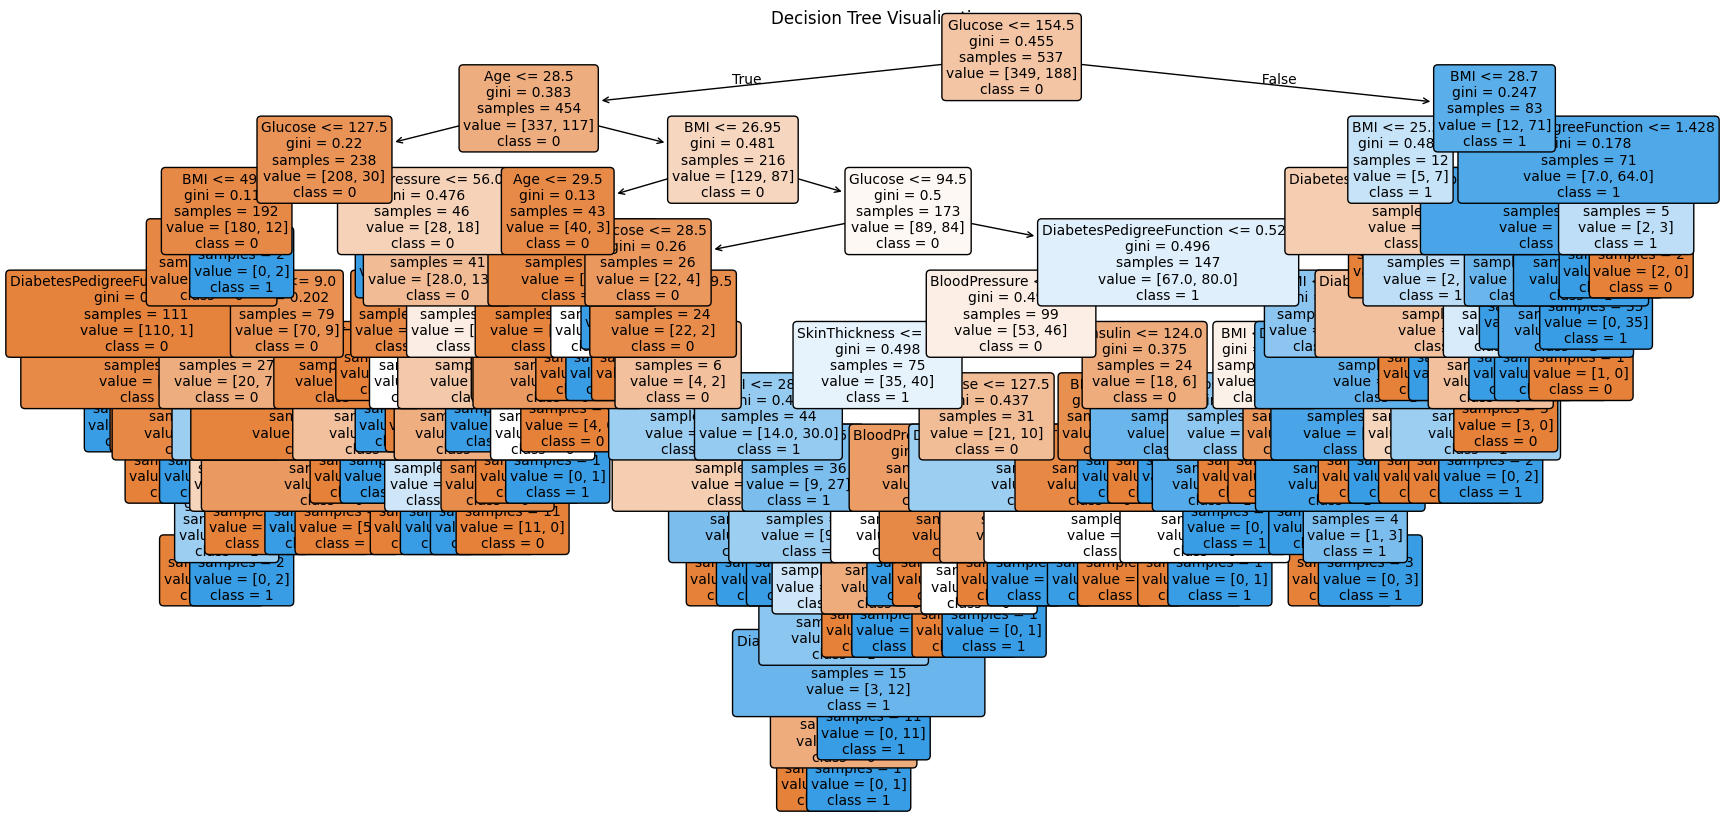

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

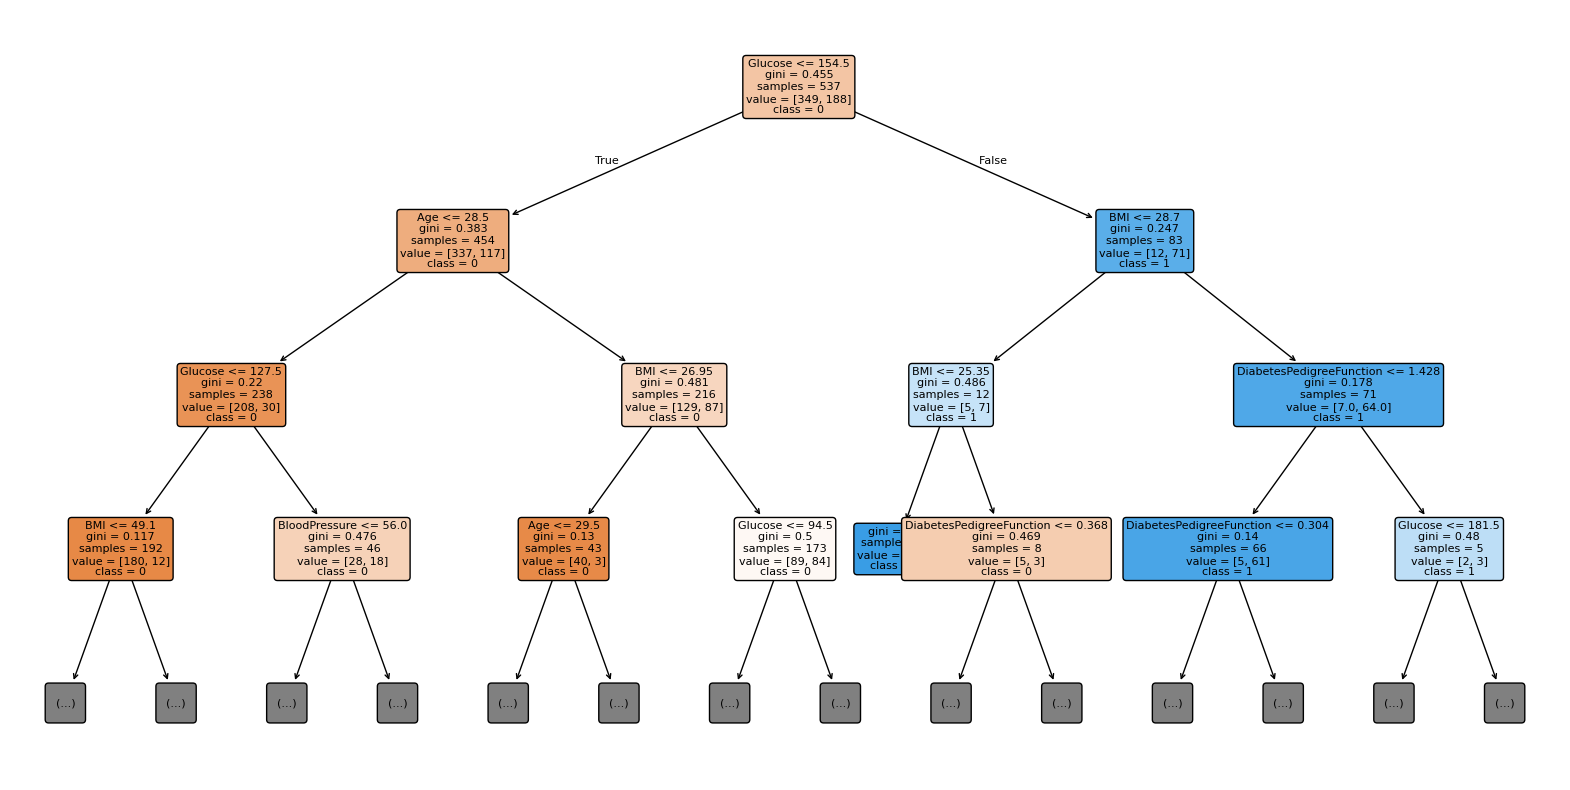

In [ ]:
# Increase the figure size to make the tree less congested
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True, fontsize=8, max_depth=3)

# Show the plot
plt.show()

## Gradient Boosting Implementation

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)

In [ ]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
report = classification_report(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb:.2f}')

Gradient Boosting Accuracy: 0.75


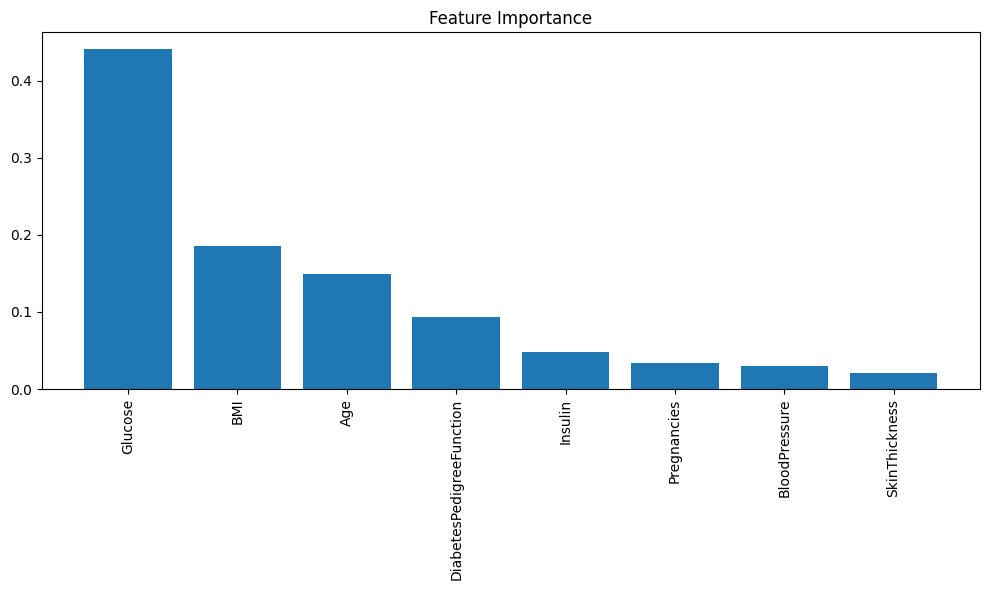

In [ ]:
# import numpy as np

feature_importances = gb_clf.feature_importances_

indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

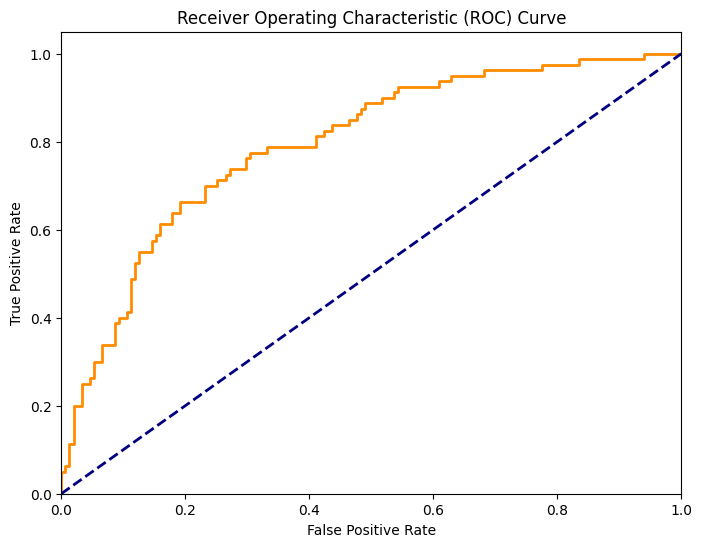

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for ROC curve
# Select the probabilities for the positive class (class 1)
y_pred_prob = gb_clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

## Model Comparison

In [ ]:
y_pred_gb = gb_clf.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gb})
print(results.head(25))

     Actual  Predicted
668       0          1
324       0          0
624       0          0
690       0          0
473       0          0
204       0          1
97        0          0
336       0          1
568       0          0
148       0          1
667       1          0
212       0          1
199       1          0
265       0          0
760       0          0
356       1          0
501       0          0
457       0          0
604       1          1
213       1          0
636       0          0
544       0          0
86        0          0
208       0          0
281       0          1


In [ ]:
random_sample = results.sample(n=25, random_state=42)
print(random_sample)

     Actual  Predicted
351       0          0
210       0          0
148       0          1
44        0          1
356       1          0
559       0          0
209       1          1
145       0          0
60        0          0
706       1          0
465       0          0
213       1          0
250       0          1
165       1          1
640       0          0
691       1          1
218       1          0
120       1          1
619       1          0
136       0          0
659       1          0
718       0          0
637       0          0
608       0          0
763       0          0
